In [4]:
import pickle
from pycocoevalcap.tokenizer.ptbtokenizer import PTBTokenizer
from pycocoevalcap.bleu.bleu import Bleu
from pycocoevalcap.meteor.meteor import Meteor
from pycocoevalcap.rouge.rouge import Rouge
from pycocoevalcap.cider.cider import Cider
from pycocoevalcap.spice.spice import Spice
import argparse


from pycocotools.coco import COCO
from pycocoevalcap.eval import COCOEvalCap
import matplotlib.pyplot as plt
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

import json
from json import encoder
encoder.FLOAT_REPR = lambda o: format(o, '.3f')



def score(num, DIR = './../../Zaidel/cap_model_3_res/'):
    print("Testing results on epoch ", num)
    print("Loading coco annotations")
    dataDir='.'
    dataType='val2014'
    algName = 'fakecap'
    annFile='%s/annotations/captions_%s.json'%(dataDir,dataType)
    subtypes=['results', 'evalImgs', 'eval']
    [resFile, evalImgsFile, evalFile]= \
    ['%s/results/captions_%s_%s_%s.json'%(dataDir,dataType,algName,subtype) for subtype in subtypes]
    coco_anns = COCO(annFile)
    print("COCO anns imported")
    
    
    
    path = DIR+ str(num)+'_test_result.tar.gz'
    save = pickle.load(open(path))
    cocoRes = {}
    coco = {}
    for key, val in save.items():
        reslst = val[u'res']
        res = []
        for data in reslst:
            if data!=u'<SEND>':
                res.append(data)
            else:
                break
        res = res[1:]
        #print "RES: ",reslst
        #print "ANN: ", val[u'ann']
        #res = [word for word in res if word!=u'<SEND>'][1:]
        #print "RES FIXED: ", res
        
         
        if len(res) == 0:
            res = [u'a'] #just not to be empty, and it has low low idf
        cocoRes[key] = [{u'caption':' '.join(res)}]
        
        #coco[key] = [{u'caption':' '.join(val[u'ann'][1:-1])}]
        coco[key] = coco_anns.imgToAnns[key]
    print 'examples'
    for key in coco.keys()[:7]:
        print "========================================================="
        print "IMG_NUM=",key
        print "Annotation: ", '\n'.join([coco[key][i][u'caption'] for i in range(len(coco[key]))])
        print "Generation: ", cocoRes[key][0][u'caption']
        print "========================================================="
    
    print 'tokenization...'
    tokenizer = PTBTokenizer()
    gts  = tokenizer.tokenize(coco)
    res = tokenizer.tokenize(cocoRes)

    print 'setting up scorers...'
    scorers = [
            (Bleu(4), ["Bleu_1", "Bleu_2", "Bleu_3", "Bleu_4"])
        ]
    score_tuple = []
    for scorer, method in scorers:
        print 'computing %s score...'%(scorer.method())
        score, scores = scorer.compute_score(gts, res)
        print(score)
        score_tuple.append((scorer.method(),score))
    return score_tuple


def score_numerous_epochs(num_of_ep):
    bleu_1 = []
    bleu_2 = []
    bleu_3 = []
    bleu_4 = []
    for i in range(num_of_ep):
        scores = score(i)
        bleu_1.append(scores[0][1][0])
        bleu_2.append(scores[0][1][1])
        bleu_3.append(scores[0][1][2])
        bleu_4.append(scores[0][1][3])
    return bleu_1, bleu_2, bleu_3, bleu_4

In [5]:
bleu_1, bleu_2, bleu_3, bleu_4 = score_numerous_epochs(15)

('Testing results on epoch ', 0)
Loading coco annotations
loading annotations into memory...
0:00:00.919665
creating index...
index created!
COCO anns imported
examples
IMG_NUM= 532481
Annotation:  A person kitesurfing over the waves of the ocean's shore.
a kite surfer is doing a flying trick over some water
A man is flying up in the air and having fun. 
A guy is waterboarding in the ocean on a windy day.
A person kite boarding in rough seas near the shoreline.
Generation:  a man riding a wave on a surfboard
IMG_NUM= 458755
Annotation:  Young woman with sheep on straw covered floor.
A child places his hands on the head and neck of a sheep while another sheep looks at his face.
A person petting the head of a cute fluffy sheep.
A child is petting a sheep while another sheep watches.
A woman kneeling to pet animals while others wait. 
Generation:  a group of sheep standing around a pile of hay
IMG_NUM= 245764
Annotation:  A cat sits on the edge of a toilet.
A cat sitting on the edge of th

setting up scorers...
computing Bleu score...
{'reflen': 48185, 'guess': [48698, 43698, 38698, 33698], 'testlen': 48698, 'correct': [32218, 15041, 6424, 2822]}
ratio: 1.01064646674
[0.6615877448765728, 0.47720095197159407, 0.33561384747722206, 0.23720187876669804]
('Testing results on epoch ', 3)
Loading coco annotations
loading annotations into memory...
0:00:00.951144
creating index...
index created!
COCO anns imported
examples
IMG_NUM= 532481
Annotation:  A person kitesurfing over the waves of the ocean's shore.
a kite surfer is doing a flying trick over some water
A man is flying up in the air and having fun. 
A guy is waterboarding in the ocean on a windy day.
A person kite boarding in rough seas near the shoreline.
Generation:  a man on a surf board riding a wave
IMG_NUM= 458755
Annotation:  Young woman with sheep on straw covered floor.
A child places his hands on the head and neck of a sheep while another sheep looks at his face.
A person petting the head of a cute fluffy sheep

setting up scorers...
computing Bleu score...
{'reflen': 48394, 'guess': [49090, 44090, 39090, 34090], 'testlen': 49090, 'correct': [32114, 15036, 6466, 2849]}
ratio: 1.01438194818
[0.6541861886331095, 0.47233137464396746, 0.3329312333764745, 0.2356580429721085]
('Testing results on epoch ', 6)
Loading coco annotations
loading annotations into memory...
0:00:00.963313
creating index...
index created!
COCO anns imported
examples
IMG_NUM= 532481
Annotation:  A person kitesurfing over the waves of the ocean's shore.
a kite surfer is doing a flying trick over some water
A man is flying up in the air and having fun. 
A guy is waterboarding in the ocean on a windy day.
A person kite boarding in rough seas near the shoreline.
Generation:  a man kiteboarding over the ocean under a cloudy sky
IMG_NUM= 458755
Annotation:  Young woman with sheep on straw covered floor.
A child places his hands on the head and neck of a sheep while another sheep looks at his face.
A person petting the head of a cu

setting up scorers...
computing Bleu score...
{'reflen': 48682, 'guess': [49539, 44539, 39539, 34539], 'testlen': 49539, 'correct': [32183, 14922, 6320, 2761]}
ratio: 1.01760404256
[0.6496497708875705, 0.46653360466694066, 0.3264518144692232, 0.2296431402208393]
('Testing results on epoch ', 9)
Loading coco annotations
loading annotations into memory...
0:00:01.009687
creating index...
index created!
COCO anns imported
examples
IMG_NUM= 532481
Annotation:  A person kitesurfing over the waves of the ocean's shore.
a kite surfer is doing a flying trick over some water
A man is flying up in the air and having fun. 
A guy is waterboarding in the ocean on a windy day.
A person kite boarding in rough seas near the shoreline.
Generation:  a man is surfing on a wave in the ocean
IMG_NUM= 458755
Annotation:  Young woman with sheep on straw covered floor.
A child places his hands on the head and neck of a sheep while another sheep looks at his face.
A person petting the head of a cute fluffy she

setting up scorers...
computing Bleu score...
{'reflen': 48502, 'guess': [49187, 44187, 39187, 34187], 'testlen': 49187, 'correct': [31442, 14405, 6056, 2637]}
ratio: 1.01412312894
[0.6392339439282608, 0.4564984287485966, 0.3181565055014799, 0.2232507314021925]
('Testing results on epoch ', 12)
Loading coco annotations
loading annotations into memory...
0:00:00.914990
creating index...
index created!
COCO anns imported
examples
IMG_NUM= 532481
Annotation:  A person kitesurfing over the waves of the ocean's shore.
a kite surfer is doing a flying trick over some water
A man is flying up in the air and having fun. 
A guy is waterboarding in the ocean on a windy day.
A person kite boarding in rough seas near the shoreline.
Generation:  a person wind surfing in the ocean with a large crowd behind them
IMG_NUM= 458755
Annotation:  Young woman with sheep on straw covered floor.
A child places his hands on the head and neck of a sheep while another sheep looks at his face.
A person petting the

setting up scorers...
computing Bleu score...
{'reflen': 49235, 'guess': [50199, 45199, 40199, 35199], 'testlen': 50199, 'correct': [31878, 14509, 6125, 2624]}
ratio: 1.01957956738
[0.6350325703699151, 0.4514943577752886, 0.3143391680572393, 0.21935990577020376]


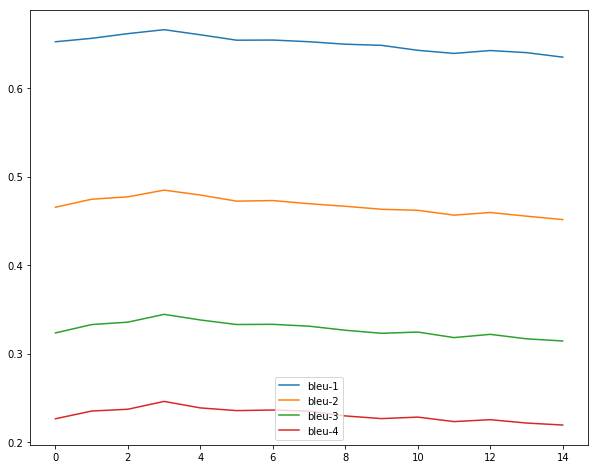

In [6]:
plt.plot(bleu_1, label = "bleu-1")
plt.plot(bleu_2, label = "bleu-2")
plt.plot(bleu_3, label = "bleu-3")
plt.plot(bleu_4, label = "bleu-4")
plt.legend()


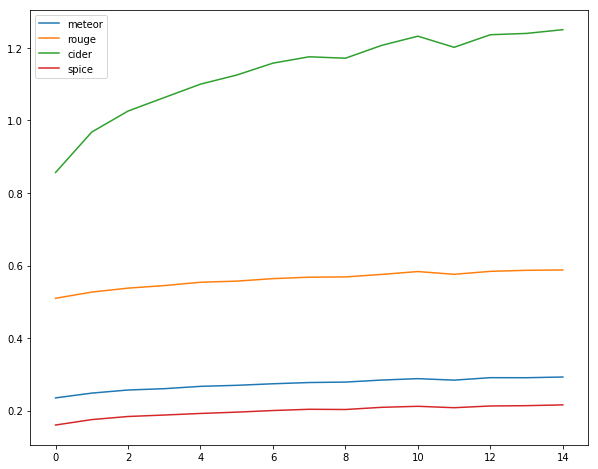

In [20]:
plt.plot(meteor, label = "meteor")
plt.plot(rouge, label = "rouge")
plt.plot(cider, label = "cider")
plt.plot(spice, label = "spice")
plt.legend()